# 9 高级特性（二）：高级扩展模块

## 上机练习 1：生成器

### 1.两个数的商

编写程序，输入两个数，输出它们的商，采用例外处理来处理两种错误，给出用户友好的提示信息。

1. 除数为 0

2. 输入了非数值

In [5]:
# a = 3
# b = 0

a = 1
b = 'abc'

try:
    n = a / b
except ZeroDivisionError as e:
    print('除数不能为 0，', e)
except TypeError as e:
    print('输入了非数值，', e)
else:
    print('没有错误')
finally:
    print('运行结束')

输入了非数值， unsupported operand type(s) for /: 'int' and 'str'
运行结束


### 2.勾股数

编写一个推导式，生成包含 100 以内所有勾股数 (i, j, k) 的列表。

In [3]:
a = [tuple(sorted((i, j, k))) for i in range(100) for j in range(100) for k in range(100) if i ** 2 + j ** 2 == k ** 2]
a = list(set(a))  # 利用集合去除重复元素
print(a)

[(0, 5, 5), (0, 21, 21), (0, 43, 43), (0, 69, 69), (0, 59, 59), (0, 85, 85), (54, 72, 90), (0, 58, 58), (0, 10, 10), (0, 26, 26), (0, 42, 42), (0, 70, 70), (0, 86, 86), (21, 28, 35), (0, 53, 53), (0, 15, 15), (0, 31, 31), (0, 75, 75), (0, 37, 37), (0, 91, 91), (0, 97, 97), (39, 52, 65), (28, 45, 53), (9, 12, 15), (36, 48, 60), (0, 8, 8), (0, 72, 72), (39, 80, 89), (14, 48, 50), (3, 4, 5), (0, 9, 9), (0, 25, 25), (0, 47, 47), (0, 73, 73), (0, 63, 63), (0, 89, 89), (0, 4, 4), (0, 20, 20), (0, 36, 36), (0, 52, 52), (0, 68, 68), (0, 84, 84), (8, 15, 17), (24, 70, 74), (42, 56, 70), (0, 40, 40), (10, 24, 26), (0, 14, 14), (0, 30, 30), (0, 46, 46), (0, 62, 62), (0, 74, 74), (0, 90, 90), (35, 84, 91), (20, 21, 29), (0, 3, 3), (0, 19, 19), (0, 57, 57), (0, 41, 41), (0, 79, 79), (0, 95, 95), (15, 20, 25), (57, 76, 95), (18, 24, 30), (24, 32, 40), (60, 63, 87), (15, 36, 39), (51, 68, 85), (0, 13, 13), (0, 29, 29), (0, 35, 35), (0, 51, 51), (0, 77, 77), (0, 93, 93), (0, 99, 99), (21, 72, 75), (12

### 3.斐波那契数列

编写一个生成器函数，能够生成斐波那契数列。

In [20]:
def fib():
    a = 0
    b = 1
    while True:
        yield b
        a, b = b, a + b


for fn in fib():
    print(fn)
    if fn > 1000:
        break

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597


## 上机练习 2：高级扩展模块应用

### 1.信息隐藏工具

相当于**数字水印**

1. 轻微改变图片中像素的 RGB 值，肉眼无法察觉

2. 将 8 bit RGB 中的最低 1 bit，用于隐藏一个数据文件（如文本)

  * 每 3 个像素可以隐藏 1 个字节

3. 注意使用不失真图像格式
  
  * BMP / PNG 格式（无损压缩）

4. 要求：
  
  * 提供图片和数据文件，生成隐藏信息的图片
  
  * 从隐藏信息的图片中提取数据文件

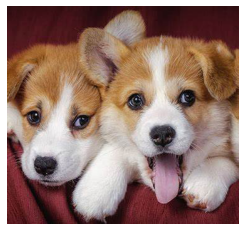

I love you


In [8]:
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import matplotlib.pyplot as plt


def encodeimg(image,strings):
    '''
    信息加密
    '''
	# 先计算要写入的数据会占用多少个像素，RGB，3个像素装一个字节
    n = (len(strings) + 1) * 3  # 需要n个像素，第一个纪录共有多少数据量
    rgblst = list(image.getdata())[:n]  # 得到图片的RGB，只取所需要的像素

    # 进行位移计算，把二进制最后一位都变0
    rlst = [(r >> 1 << 1, g >> 1 << 1, b >> 1 << 1) for (r, g, b) in rgblst]
    # binevenpix = [(bin(r), bin(g), bin(b)) for (r, g, b) in rlst]  # 转换成二进制

    # 将要写入的数据，字符串换成二进制
    firstdata = bin(len(strings)).lstrip('0b').zfill(8)  # 先计算数据的长度，放在最前面的
    # 返回一串二进制字符串
    binary = firstdata + ''.join([bin(ord(c)).lstrip('0b').zfill(8) for c in strings])

    # 将要写入的数据，写进图片并保存
    # a = evenpix    # 待写入的位置
    # b = binary  # 待写入的数据
    c = 0
    t = ()  # 元组
    z = []  # 中转列表
    l = []  # 最后列表
    for i in rlst:
        for j in i:
            if c == len(binary):
                z.append(j)
            else:
                z.append(j + int(binary[c]))
                c = c + 1
            t = tuple(z)
        l.append(t)
        z = []
        t = ()

    image.putdata(l)
    return image


# 获得图片数据
def decodeimg(image):
    '''
    解密图片，先获得数据长度
    '''
    # 先得到头3个像素，获取数据量
    rgblst = list(image.getdata())[:3]
    # 先右位移再左位移，如果跟原来的数字相等，说明其二进制尾数是0，返回False,否则返回True
    binary = ''.join(
        [str(int(r >> 1 << 1 != r)) + str(int(g >> 1 << 1 != g)) + str(int(b >> 1 << 1 != b)) for (r, g, b) in
         rgblst])
    length = int(binary[:8], 2)  # 求出数据量了
    # 所需数据的位
    datalength = (length + 1) * 8
    # 把隐藏数据的像素列举出来
    codelst = list(image.getdata())[:datalength // 3 + 1]
    # 
    binary2 = ''.join(
        [str(int(r >> 1 << 1 != r)) + str(int(g >> 1 << 1 != g)) + str(int(b >> 1 << 1 != b)) for (r, g, b) in
         codelst])
    binaryfinal = binary2[8:datalength]
    # 将获得的数据，从二进制变成字符串
    decodetxt = ''
    for ch in range(0, len(binaryfinal), 8):
        decodetxt += chr(int(binaryfinal[ch:ch + 8], 2))
    return decodetxt


# 输入要加密的图片和文字
dog = Image.open('./hide_info.jpg')
strings = 'I love you'

# 加密并保存为新图片
img = encodeimg(dog, strings)
plt.imshow(img)
plt.axis('off')
plt.show()
# 对新图片解码
print(decodeimg(img))

> **注**：由于本人对 `PIL` 包不熟，参考了博主 `大叔小py` 的[这篇博客](https://blog.csdn.net/byakki/article/details/86771836)

### 2.微博系统

开发一个单用户的微博系统

* 可以浏览、发帖、删帖、回复

* 利用 Flask 编程 / shelve 持久存储

*涉及到 `html` 的知识，不再深入探讨*

### 3.蒙特卡罗方法求圆周率

蒙特卡罗方法原理：通过大量随机样本，去了解一个系统，进而得到所要计算的值

用蒙特卡罗方法计算圆周率 $\pi$

* 正方形内部有一个相切的圆

* 在这个正方形内部，随机产生 10,000 个点，计算它们与中心点的距离，从而判断是否落在圆的内部

* 如果这些点均匀分布，那么圆内的点应该占到所有点的 $\frac{\pi}{4}$

$$\frac{圆的面积}{正方形的面积} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}$$

用 `matplotlib` 可视化

PI =  3.1152


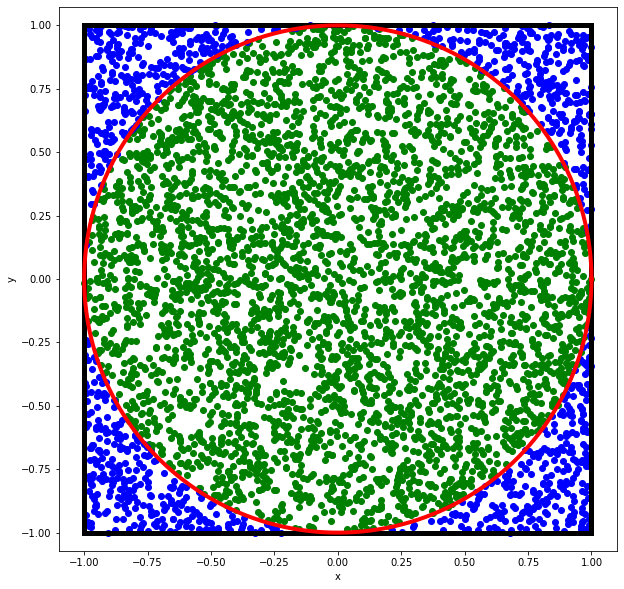

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

# 画一个边长为 2 的正方形
x1 = np.linspace(-1, 1, 1000)
x2 = x1
y1 = x1
y2 = x1
plt.plot(x1, np.ones_like(x1), 'k', linewidth=5.0)
plt.plot(x2, -np.ones_like(x1), 'k', linewidth=5.0)
plt.plot(np.ones_like(y1), y1, 'k', linewidth=5.0)
plt.plot(-np.ones_like(x1), y2, 'k', linewidth=5.0)

# 画一个半径为 1 的圆
theta = np.linspace(0, 2*np.pi, 800)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, color='r', linewidth=4.0)

# 在正方形中均匀撒点
point_num = 5000  # 撒点个数，撒点越多，PI 值越精确
m = np.random.uniform(-1, 1, point_num)
n = np.random.uniform(-1, 1, point_num)
count = 0
cir_in_x = []
cir_in_y = []
cir_out_x = []
cir_out_y = []

for i in range(point_num):
    if m[i] ** 2 + n[i] ** 2 <= 1:  # 在圆内
        count += 1
        cir_in_x.append(m[i])
        cir_in_y.append(n[i])
    else:
        cir_out_x.append(m[i])
        cir_out_y.append(n[i])

plt.scatter(cir_in_x, cir_in_y, c='g')
plt.scatter(cir_out_x, cir_out_y, c='b')

# 求出 PI 值
pi = 4 * count / point_num
print('PI = ', pi)

# plt 的相关设置
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

## 补充

利用 `Pillow` 生成验证码

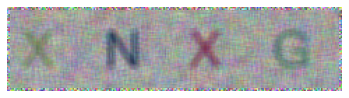

In [3]:
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import matplotlib.pyplot as plt
import random

# 随机字母
def rnd_char():
    return chr(random.randint(65, 90))  # A-Z 的 ASCII 码
    

# 文字的随机颜色：
def rnd_color1():
    return(random.randint(64, 255),
           random.randint(64, 255),
           random.randint(64, 255))


# 背景的随机颜色：
def rnd_color2():
    return(random.randint(32, 127),
           random.randint(32, 127),
           random.randint(32, 127))


# 240 * 60
width = 60 * 4
height = 60
image = Image.new('RGB', (width, height), (255, 255, 255))

# 创建 Font 对象
font = ImageFont.truetype('arial.ttf', 36)  # 需要把对应的字体文件放在当前目录下

# 创建 Draw 对象
draw = ImageDraw.Draw(image)

# 填充每个像素
for x in range(width):
    for y in range(height):
        draw.point((x, y), fill=rnd_color1())

# 输出文字
for t in range(4):
    draw.text((60 * t + 10, 10), rnd_char(), font=font, fill=rnd_color2())

# 模糊
image = image.filter(ImageFilter.BLUR)

plt.imshow(image)
plt.axis('off')
plt.show()